This notebook contains the following:

1)	Importing relevant libraries and dataset.

2)	Checking the hour variable for patterns.

3)	Creating a histogram to visualise distribution of data.

4)	Creating a line chart – pattern of use by hour.

5)	Correlation between hour of day and fare.

6)	Checking for stationarity. 


In [1]:
# Importing Analitycal and Visual libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime 
import folium
import json
import plotly
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

Creating a path to import and working on data set

In [3]:
# Establishing path
path = r'C:\Users\Paola\Desktop\Shaul\Data\CF\Data Immersion\Achievement 6\Uber October-2023 Basket Analysis'

In [4]:
# Following observations from previous notebooks, trip fare has been limited to $15 in order not to skew the data.

df = pd.read_csv(os.path.join(path, '2-Data', 'Prepared Data', 'uber_usd15_trips.csv'), index_col = False)

In [5]:
df.columns

Index(['VendorID', 'pickup_date', 'pickup_time', 'dropoff_date',
       'dropoff_time', 'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'Trip category',
       'Fare category', 'pickup_time_new', 'dropoff_time_new',
       'pickup_date_new', 'dropoff_date_new', 'geometry', 'Borough_name',
       'payment_category'],
      dtype='object')

In [6]:
df.shape

(74551, 30)

In [7]:
df['pickup_date_new'].value_counts(dropna = False)

2016-03-10    58368
2016-03-01    16183
Name: pickup_date_new, dtype: int64

Note:

There is no enough data to check per day of the week - to contrast between weedays and weekend days - as there are only two entries. The first entry is a Tuesday, and the second is a Thursday on the following week.

Checking the 'hour' variable for a pattern

In [8]:
# I am splitting the 'pickup time new' column into 3 columns: hours, minutes and seconds.
# The reasoning is to 'group' all trips per hour groups, in order to check if there is a pattern.
df[['h','m','s']] = df['pickup_time_new'].astype(str).str.split(':', expand=True).astype(int)

In [13]:
df.shape

(74551, 31)

In [10]:
# Dropping the unnecessary columns.
df = df.drop(columns=['m', 's'])

In [15]:
# Renaming the time-variable column for easier identification
df.rename(columns = {'h' : 'hour'}, inplace = True)

In [16]:
# Checking results
df.columns

Index(['VendorID', 'pickup_date', 'pickup_time', 'dropoff_date',
       'dropoff_time', 'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'Trip category',
       'Fare category', 'pickup_time_new', 'dropoff_time_new',
       'pickup_date_new', 'dropoff_date_new', 'geometry', 'Borough_name',
       'payment_category', 'hour'],
      dtype='object')

In [17]:
sub = df[['hour', 'fare_amount']]

Visualising the distribution of data

C:\Users\Paola\AppData\Local\Temp\ipykernel_11212\211626354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sub['hour'], bins=25) # Shows extreme values


<Axes: xlabel='hour', ylabel='Density'>

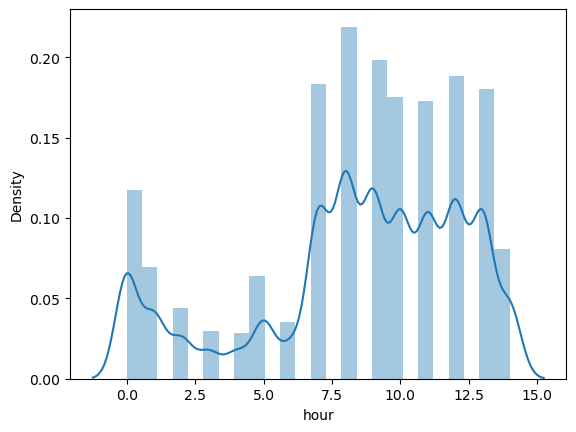

In [24]:
# Checking  data
sns.distplot(sub['hour'], bins=25) # Shows extreme values

The hour available within this dataset are between 12:00AM (00:00) and 3:0mPM (15:00).

This represents a significant limitation to the data, as it is not possible to observe a full 24-hour period. However, it is still possible to look for patterns and derive insights of people's usage of the Uber service.

This histogram suggests that most of the data is located in the morning and early afternoon hours, with a small activity in the late night hours followed by a significant drop.

Checking pattern of use by the hour. Creating a line chart.

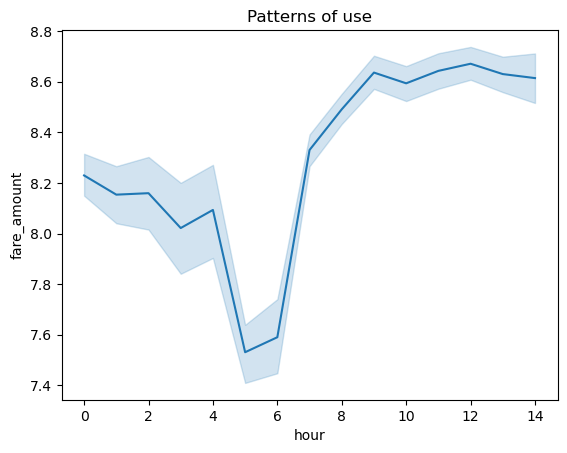

In [35]:
line = sns.lineplot(data = sub, x = 'hour',y = 'fare_amount').set(title = 'Patterns of use')

NOTE: there is a significant limitation in this dataset for not being able to observe a 24-hour period. However, deriving insights is still possible according the the stakeholder's goals.

The trend line suggests a drop of activity in the late hour of the night. There is a surge in usage from 6:00AM, which further increases after 8:00AM. after that time, there are small fluctuation in the line, but it appears stable.

Considering the average length of trips, the average amount paid for them, and that most trips are of 1 or 2 individuals, it seems reasonable to conclude that users consider Uber a cheap and affordable way to commute to work, rather than using public transport. 

This is, however, not conclusive. Users use the service throughout the day and it seems there is not direct relation between the hour of the day and fare paid.

Checking correlation between the 'hour' variable and the 'fare amount' variable.

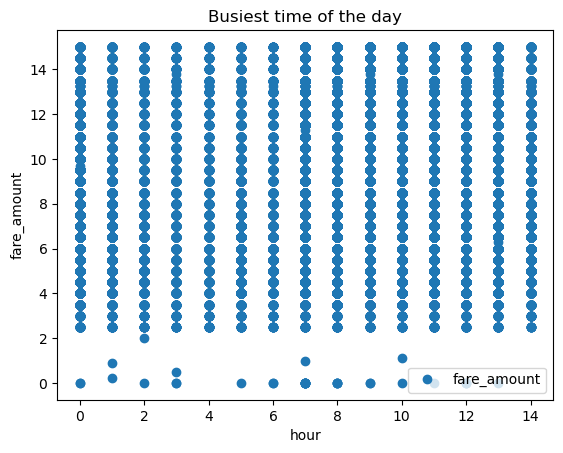

In [38]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sub.plot(x = 'hour', y='fare_amount',style='o') 
plt.title('Busiest time of the day')  
plt.xlabel('hour')  
plt.ylabel('fare_amount')  
plt.show()
# Visualisation saved using right click, to visualisation folder.

In [26]:
# There seems to be no pattern between hour and fare.
# I am now checking the correlation between these 2 variables (hour and fare).
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = sub['hour'].values.reshape(-1,1)
y = sub['fare_amount'].values.reshape(-1,1)

In [27]:
# Checking the arrays
X

array([[0],
       [0],
       [0],
       ...,
       [6],
       [6],
       [6]])

In [28]:
y

array([[ 9. ],
       [11. ],
       [ 5.5],
       ...,
       [14. ],
       [ 5.5],
       [ 6. ]])

In [29]:
# Spliting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
# Checking the X_train array
X_train

array([[ 0],
       [ 8],
       [13],
       ...,
       [12],
       [12],
       [ 5]])

In [31]:
# Creating a regression object.

reg = LinearRegression()

In [32]:
# Fitting the regression object onto the training set.

reg.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predicting the values of y using X.

y_pred = reg.predict(X_test)

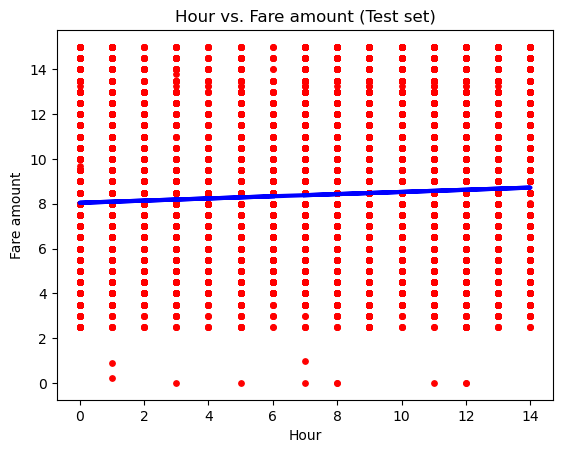

In [34]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='red', s = 15)
plot_test.plot(X_test, y_pred, color='blue', linewidth =3)
plot_test.title('Hour vs. Fare amount (Test set)')
plot_test.xlabel('Hour')
plot_test.ylabel('Fare amount')
plot_test.show()
# Saving graph with right click.

In [36]:
sub.corr()

,hour,fare_amount
hour,1.000000,0.065361
fare_amount,0.065361,1.000000


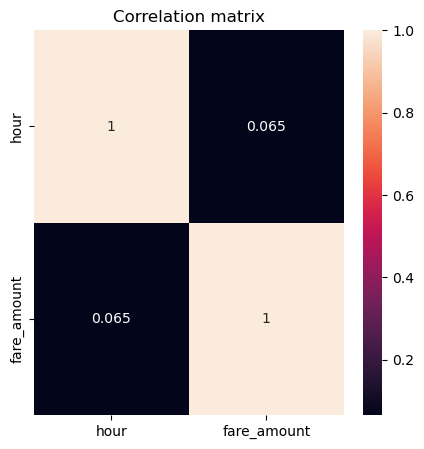

In [37]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(5,5))

# Create the correlation heatmap in seaborn.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax).set(title = 'Correlation matrix') 

The correlation between 'hour' and 'fare' is practically non-existent. 

While in the trend line we do observe a surge of use after 6:00 AM, there is no correlation between these two variables. 

Checking for Stationarity

In [49]:
from statsmodels.tsa.stattools import adfuller # Importing the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub['hour'])

Dickey-Fuller Stationarity test:
Test Statistic                    -4.266819
p-value                            0.000507
Number of Lags Used                0.000000
Number of Observations Used    74550.000000
Critical Value (1%)               -3.430438
Critical Value (5%)               -2.861579
Critical Value (10%)              -2.566791
dtype: float64


The data is non-stationary.

As stated in the previous notebooks my hypothesis  was:
Null hypothesis: Trips during unsociable hours or on weekends do not cost more expensive than during social hours/weekdays.

Alternative hypothesis: Trips during unsociable hours or weekends cost more than during social hours/weekdays.

CONCLUSION: the test run - in the previous notebook - in this variable (unsociable hours vs. fare) has shown that the null hypothesis cannot be rejected. The timing of the trip (hour of the day) does not play a role in the fare to be paid.

NEXT: in the next notebook, I will check wehether the duration of the trip (in minutes) plays a role in increasing the fare to be paid.